# PCA Practice

## Concepts

#### Give at least two reasons why one might use PCA.  Be sure to include discussion of what problem PCA solves and how.

#Your answers here
It is efficiant, and can help with overfitting and multicollinarity. 

In [3]:
# Run as-is
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import pickle as pkl

with open('test_obj/X.pkl', 'rb') as f:
    X = pkl.load(f)

with open('test_obj/y.pkl', 'rb') as f:
    y = pkl.load(f)  

from test_scripts.test_class import Test
test = Test()

## Application

### Data Exploration

- Turn `X` (a np array of features) into a dataframe.  
    - How many features are there? 
    - How many observations are there?

- Turn `y` (a np array of the target) into a df.
    - Are the observations in y continuous or discreet?
    - Would prediction of y be a regression or classification problem?

In [4]:
# your work here
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,55.921010,15.960047,79.847579,-74.575722,62.516598,53.176317,-51.041311,11.320495,41.056206,-53.242694,...,-17.650115,-178.500520,24.571521,-57.691007,-118.814451,96.518514,-135.794932,23.756274,-88.186923,-154.113549
1,-73.137546,262.099610,203.580404,69.886526,-87.645923,-37.853021,162.116358,-6.703982,-68.917502,-113.079926,...,146.513688,138.809206,-31.582876,-12.368799,123.042927,9.881037,80.389418,9.012742,-235.405012,-114.050512
2,-69.267421,-88.897460,-278.270517,31.852727,78.004654,43.549353,114.118687,-7.801539,3.054873,177.264452,...,164.909886,44.116772,-20.406617,87.463821,-31.078816,-54.469739,-155.910400,-8.145598,-80.744555,-70.138429
3,43.179196,-21.603889,68.748104,-290.428027,-7.420026,23.682904,-200.636222,28.736841,26.592064,0.825606,...,38.956570,35.309093,34.423370,161.662262,68.547606,-9.943278,103.701966,-43.998760,33.854567,-118.591361
4,-2.371481,-211.755001,-64.853466,148.339519,-49.650926,-46.684332,-187.940417,-11.942910,-17.884681,100.247822,...,-357.976799,154.390629,-34.631452,-49.448503,54.648795,-80.964527,100.676255,-24.848862,84.467553,37.958813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.933241,-280.651397,27.322593,147.632936,-23.827173,-7.847760,31.971727,30.387287,3.045001,103.723499,...,210.020625,140.426647,-17.957511,-51.123003,53.406823,30.502158,42.589689,49.841822,-33.491129,66.421318
9996,8.740935,102.048425,-162.498064,-606.065395,49.876584,21.151854,-100.499972,-25.898545,125.459552,166.601057,...,-61.127880,-19.540310,5.084644,28.765929,-95.634852,-6.299816,-31.578054,0.969460,229.874286,-65.522408
9997,20.409360,407.554583,187.559316,142.268610,48.600248,120.130176,-230.321284,41.967207,35.074751,-272.738484,...,127.685204,42.587286,-13.131699,125.849059,79.274089,114.565831,88.808943,-9.852505,-84.356507,-37.092551
9998,-49.744315,-191.191809,16.214385,230.632755,-6.947054,-11.524058,36.776765,-58.931816,13.124467,158.883470,...,-150.333578,18.777163,-15.570747,-116.394819,11.541135,207.663864,3.171231,26.771259,56.250688,97.389784


How many features are there?
200
How many observations are there?
1000

In [6]:
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


Are the observations in y continuous or discreet?
Discrete
Would prediction of y be a regression or classification problem?
Classification 

### PCA Exploration

#### Run the following steps
- Train Test Split, `random_state` = 1

- Scale w/ StandardScaler

- For the full PCA transformation (ie, w/o specifying `n_components` number)
on `X_train`, store the explained variance ratio for each component 
in `evr`

- Graph `evr`

- Re-graph the first few components in order to focus on them (you'll see why)

How many principal components does it look like we should choose?

In [8]:
#Your work here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_train)
evr = pca.explained_variance_ratio_

In [29]:
evr.shape

(200,)

In [30]:
X_train.shape

(7500, 200)

In [33]:
y_train.shape

(7500,)

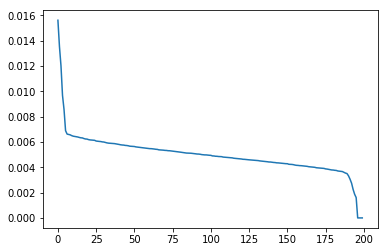

In [42]:
plt.plot(evr)

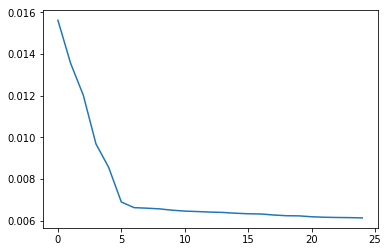

In [46]:
plt.plot(evr[:25])

### Calculate Train and Test Error

#### Run the following:
- for the first 50 principal components,
  - scale the data
  - generate the number of principal components and transform them into features
  - Using Logistic Regression with default inputs, generate train and test predictions through 10-fold cross validation
    - *Hint:* use `sklearn.cross_validate`
    - *Level up:* ideally, you would scale and PCA on each training fold (why?).  Use a pipeline!
  - graph the means of the train and test predictions for each number of principal component

#### Interpret the graph  
- How many principle components should we choose based on this?
- Is overfitting or underfitting a problem?

#### Level up
- Repeat the above but don't scale the data.  Intepret the results.

In [ ]:
#Your work here